In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('cleaned.csv')
df.head()

,Bid_Price_From,Bid_Price_To,Market_Lot,Listing_at,Qualified_Institutional_Buyers,Non_Institutional_Investors,Retail_Individual_Investors,Total_Subscription,Listing_day_open,Listing_day_last_trade,Bidding_Period,Bid_Opening_Month,Bid_Closing_Month
0,90.0,100.0,70.0,1,0.86,4.76,1.03,1.50,105.500,90.875,2,8,9
1,55.0,60.0,100.0,1,1.08,3.10,1.02,1.30,57.500,136.975,4,2,2
2,275.0,325.0,20.0,1,12.83,11.01,3.36,9.80,342.500,317.275,3,6,6
3,80.0,85.0,80.0,1,0.49,5.31,2.64,1.97,89.525,95.750,3,7,7
4,100.0,120.0,50.0,1,0.75,3.98,0.77,1.24,122.525,119.275,3,7,7


# 1. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bid_Price_From                  509 non-null    float64
 1   Bid_Price_To                    509 non-null    float64
 2   Market_Lot                      509 non-null    float64
 3   Listing_at                      509 non-null    int64  
 4   Qualified_Institutional_Buyers  509 non-null    float64
 5   Non_Institutional_Investors     509 non-null    float64
 6   Retail_Individual_Investors     509 non-null    float64
 7   Total_Subscription              509 non-null    float64
 8   Listing_day_open                509 non-null    float64
 9   Listing_day_last_trade          509 non-null    float64
 10  Bidding_Period                  509 non-null    int64  
 11  Bid_Opening_Month               509 non-null    int64  
 12  Bid_Closing_Month               509 

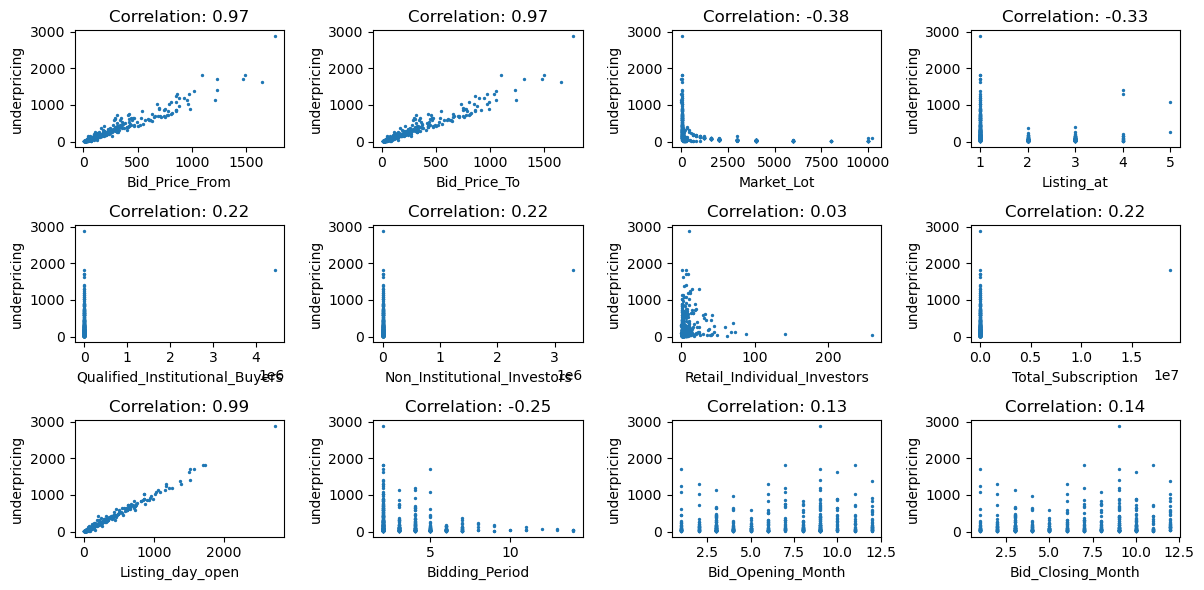

In [4]:
# show the correlation between each feature with the target feature

features = df.drop(columns = "Listing_day_last_trade")
target = df["Listing_day_last_trade"]

num_features = features.shape[1]
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (12, 6))
flat_axs = axs.flatten()

for idx, column in enumerate(features.columns):
    correlation = df[column].corr(target)
    variable = features[column]
    flat_axs[idx].scatter(x = variable, y = target, s = 2)
    flat_axs[idx].set_xlabel(column)
    flat_axs[idx].set_ylabel("underpricing")
    flat_axs[idx].set_title(f'Correlation: {correlation:.2f}')

# Remove the remaining subplots
[ax.axis("off") for ax in flat_axs[idx + 1: ]]

plt.tight_layout()
plt.show()

## 1.1. Target distribution

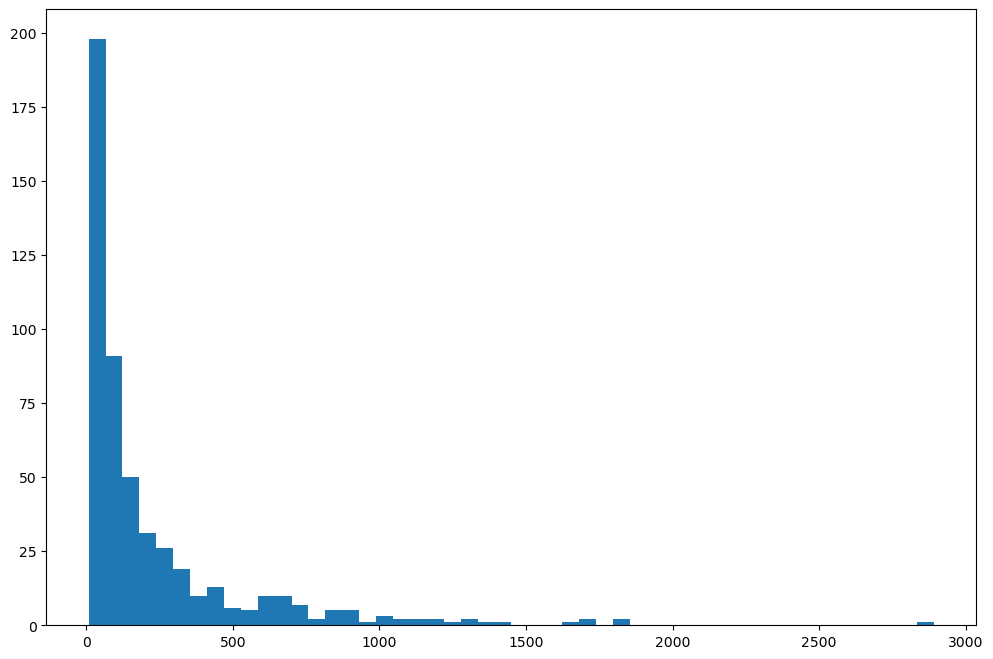

In [5]:
# Plot the distribution of the target
plt.figure(figsize = (12, 8))
plt.hist(target, bins = 50)
plt.show()

The target distribution is far from normal, thus we do a normalization

In [6]:
from scipy.stats import boxcox

transformed_target = target.copy()
transformed_target = boxcox(df["Listing_day_last_trade"])[0]

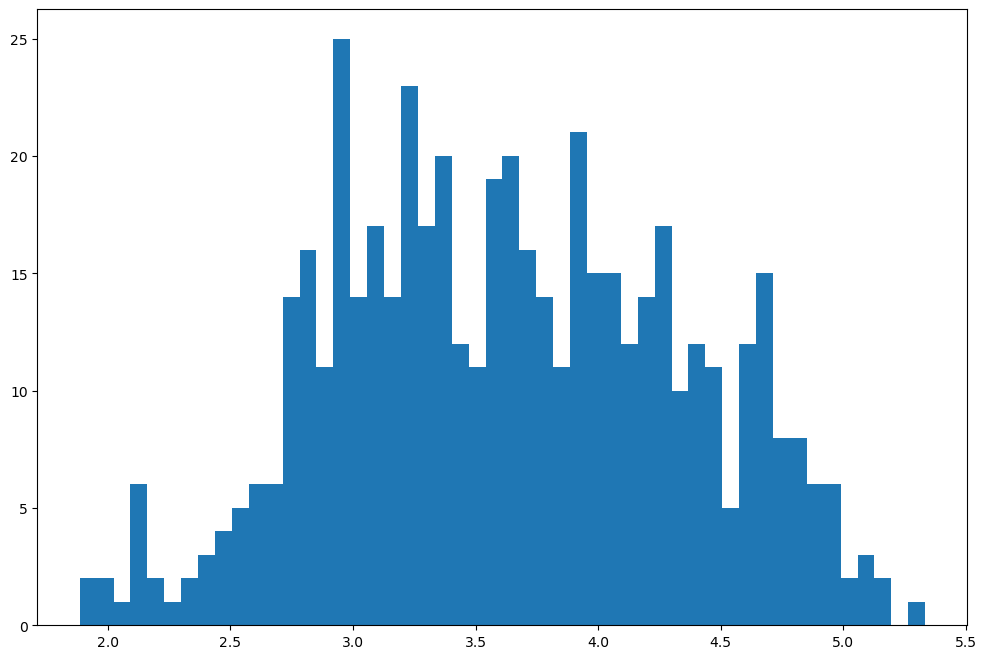

In [7]:
# Plot the distribution of the target
plt.figure(figsize = (12, 8))
plt.hist(transformed_target, bins = 50)
plt.show()

## 1.2. Features distribution

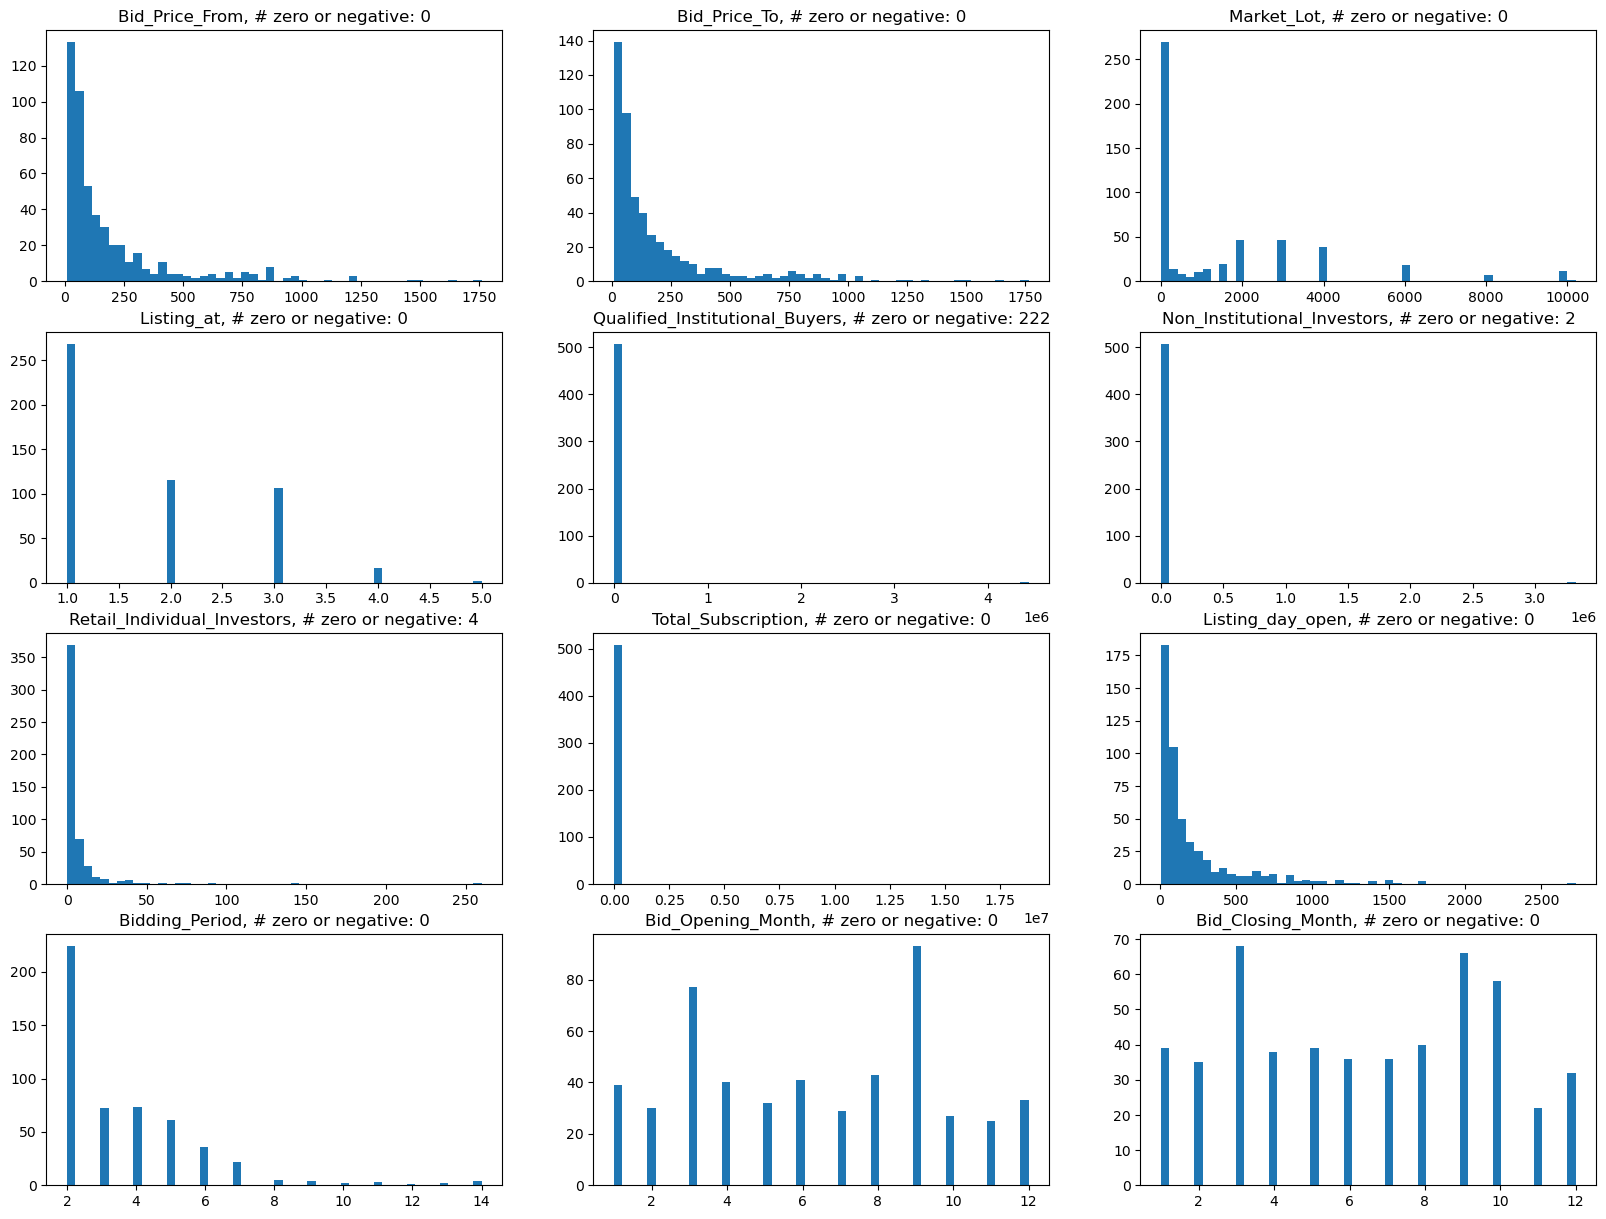

In [8]:
transform = features

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,15))
flat_axs = axs.flatten()

for idx, column in enumerate(transform):
    flat_axs[idx].hist(features[column], bins = 50)

    negatives = (features[column] <= 0).sum()
    flat_axs[idx].set_title(f"{column}, # zero or negative: {negatives}")

plt.show()

From the histograms, we observe that many features have a skewed distribution. Although regression does not require an assumption of normality in features, transforming features to approximately normal can make the features more informative for the model to learn from.

In [9]:
transformed_features = features.copy()
transformed_features = features.drop(columns = ["Bid_Price_From", "Bid_Price_To", "Market_Lot",
                                                "Total_Subscription", "Listing_day_open", "Bidding_Period"])

transformed_features["boxcox Bid_Price_From"] = boxcox(df["Bid_Price_From"])[0]
transformed_features["boxcox Bid_Price_To"] = boxcox(df["Bid_Price_To"])[0]
transformed_features["boxcox Market_Lot"] = boxcox(df["Market_Lot"])[0]
transformed_features["boxcox Total_Subscription"] = boxcox(df["Total_Subscription"])[0]
transformed_features["boxcox Listing_day_open"] = boxcox(df["Listing_day_open"])[0]
transformed_features["boxcox Bidding_Period"] = boxcox(df["Bidding_Period"])[0]

transformed_features

,Listing_at,Qualified_Institutional_Buyers,Non_Institutional_Investors,Retail_Individual_Investors,Bid_Opening_Month,Bid_Closing_Month,boxcox Bid_Price_From,boxcox Bid_Price_To,boxcox Market_Lot,boxcox Total_Subscription,boxcox Listing_day_open,boxcox Bidding_Period
0,1,0.86,4.76,1.03,8,9,3.530416,3.680488,3.910665,0.370452,3.683372,0.522647
1,1,1.08,3.10,1.02,2,2,3.225292,3.351624,4.210044,0.247393,3.299346,0.811210
2,1,12.83,11.01,3.36,6,6,4.162849,4.377417,2.825030,1.423330,4.362065,0.711759
3,1,0.49,5.31,2.64,7,7,3.458972,3.577700,4.023241,0.583912,3.581886,0.711759
4,1,0.75,3.98,0.77,7,7,3.593526,3.793806,3.624345,0.204976,3.774327,0.711759
...,...,...,...,...,...,...,...,...,...,...,...,...
504,4,0.00,0.75,3.96,9,9,3.394257,3.530845,4.023241,0.370452,3.549462,0.522647
505,4,0.00,3.44,1.36,3,3,2.825765,2.922872,4.779900,-0.010073,2.858386,0.811210
506,4,73.18,111.85,5.54,9,9,4.894956,5.070596,2.366677,1.823172,5.108246,0.522647
507,5,48.64,159.03,6.48,1,1,4.700408,4.860491,2.731249,1.837986,4.949998,0.522647


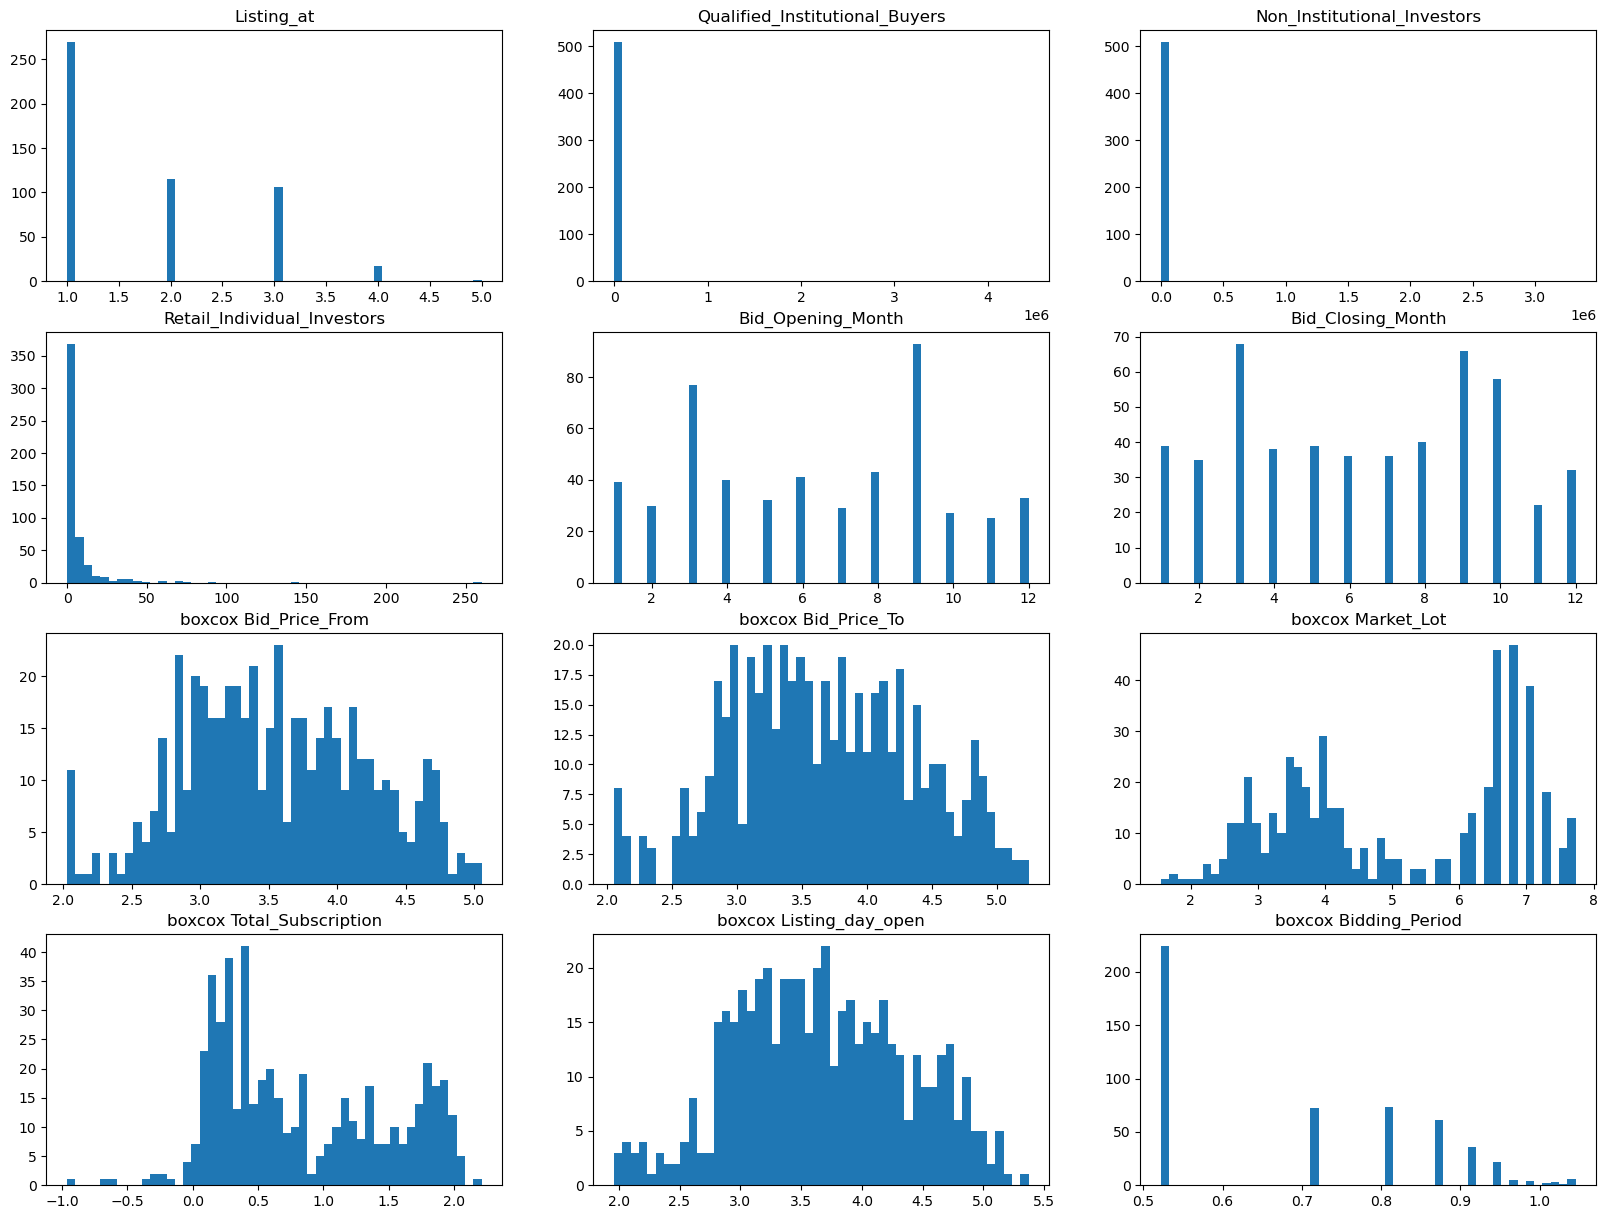

In [10]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,15))
flat_axs = axs.flatten()

for idx, column in enumerate(transformed_features):
    flat_axs[idx].hist(transformed_features[column], bins = 50)

    flat_axs[idx].set_title(f"{column}")

plt.show()

# 2. Machine Learning Model

In [15]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [16]:
# declare variable and functions
x = transformed_features
y = transformed_target

def calculate_si(rmse, actual_values):
    std_deviation = np.std(actual_values)
    scatter_index = rmse / std_deviation
    return scatter_index

def ml_metrics(yTest, TestPred, name):
    # Calculate rmse
    RMSE = np.sqrt(mean_squared_error(yTest, TestPred))
    # Calculate Scatter Index
    SI = calculate_si(RMSE, yTest)
    # Calculate MAE
    MAE = mean_absolute_error(yTest, TestPred)
    # Calculate R2
    R2 = r2_score(yTest, TestPred)
    data = {
        'Model': [name],  
        'MAE': [round(MAE, 4)],
        'RMSE': [round(RMSE, 4)],
        'Scatter Index': [round(SI, 4)],
        'R2': [round(R2, 4)]
        }
    
    # Create the DataFrame
    metrics = pd.DataFrame(data)

    return metrics

## 2.1. Random forest

In [39]:
#Setting up the Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 100, criterion = 'friedman_mse',random_state = 0)

# Split into both training and testing
xTrainF,xTestF,yTrainF,yTestF = train_test_split(x,y, test_size=0.2)

#Setting up variables to fit to model
rf = forest.fit(xTrainF,yTrainF)

#Setting up prediction train
fTrainPred = forest.predict(xTrainF)
fTestPred = forest.predict(xTestF)

In [40]:
rf_metrics = ml_metrics(yTestF, fTestPred, 'random forest')

rf_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,random forest,0.0808,0.1532,0.2132,0.9545


## 2.2. Gradient boosting

In [13]:
#Setting up the Random Forest Regressor
gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Split into both training and testing
xTrainG,xTestG,yTrainG,yTestG = train_test_split(x,y, test_size=0.2)

#Setting up variables to fit to model
gbr = gradient.fit(xTrainG,yTrainG)

#Setting up prediction train
gTrainPred = gradient.predict(xTrainG)
gTestPred = gradient.predict(xTestG)

In [14]:
gbr_metrics = ml_metrics(yTestG, gTestPred, 'gradient boosting')

gbr_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,gradient boosting,0.0839,0.1675,0.2152,0.9537


## 2.3. XGBoost

In [41]:
#Setting up the Random Forest Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Split into both training and testing
xTrainX,xTestX,yTrainX,yTestX = train_test_split(x,y, test_size=0.2)

#Setting up variables to fit to model
xgb = xgb_reg.fit(xTrainX,yTrainX)

#Setting up prediction train
xTrainPred = xgb_reg.predict(xTrainX)
xTestPred = xgb_reg.predict(xTestX)

In [42]:
xgb_metrics = ml_metrics(yTestX, xTestPred, 'xgboost')

xgb_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,xgboost,0.0539,0.0969,0.1391,0.9806


# 3. Neural Network Model

In [81]:
# build neural network function
import keras
from keras import layers

def build_dnn(optimizer, num_features, num_neurons, num_layers, dropout = 0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation = "relu"))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer = optimizer,
        loss = "mse",
        metrics = [keras.metrics.RootMeanSquaredError(name = "rmse")]
    )
    return model

In [44]:
num_features = transformed_features.shape[1]
# Split the data into train and test for model fitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    transformed_features, transformed_target, 
    test_size = 0.2, random_state = 42)

# Scale the data for potentially faster training
scaler = StandardScaler()

# Only scale data based on training set
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Generate diagram to see compare the raining loss  ad validation loss to see the model results
def plot_metrics(history, label = ""):
    fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 8))
    plt.suptitle(f"{label} Model Results")

    axs[0].set_title("Loss function")
    axs[0].plot(history.history["loss"], label = "Training loss")
    axs[0].plot(history.history["val_loss"], label = "Validation loss")
    axs[0].legend()

    axs[1].set_title("RMSE")
    axs[1].plot(history.history["rmse"], label = "Training RMSE")
    axs[1].plot(history.history["val_rmse"], label = "Validation RMSE")
    axs[1].legend()

    plt.show()

    last_train_rmse = history.history["rmse"][-1]
    last_val_rmse = history.history["val_rmse"][-1]

    print(f"{label} Model Training RMSE: {last_train_rmse:.3f}")
    print(f"{label} Model Validation RMSE: {last_val_rmse:.3f}")

In [46]:
def plot_scatter(model, name):
    mse = mean_squared_error(y_test, test_pred)
    RMSE = np.sqrt(mse)
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

    # Plot Predicted vs True scatterplot
    axs[0].set_title("Predicted vs True")
    axs[0].scatter(x = test_pred, y = y_test)
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("True")

    # Plot Predicted vs True as time-series(?)
    plot_index = np.arange(len(y_test))
    axs[1].set_title("Predicted vs True")
    axs[1].plot(plot_index, y_test)
    axs[1].plot(plot_index, test_pred)
    plt.show()

    print(f'RMSE of the {name} model : {RMSE:.4f}')

In [47]:
def performance_metric(name):
    # Calculate MAE
    mae = mean_absolute_error(y_test,test_pred)

    # Calculate Scatter Index
    rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    std_deviation = np.std(y_test)
    scatter_index = rmse / std_deviation

    # Calculate R2 score
    R2 = r2_score(y_test,test_pred)

    data = {
    'Model': [name],  
    'MAE': [round(mae, 4)],
    'RMSE': [round(rmse, 4)],
    'Scatter Index': [round(scatter_index, 4)],
    'R2': [round(R2, 4)]
    }
    
    # Create the DataFrame
    results = pd.DataFrame(data)
    
    return results

## 3.1. Optimizer exploration

### 3.1.1. Adam

In [52]:
# Built a new model using the parameters from the RSCV
adam_model = build_dnn('adam',num_features = num_features, 
                       num_neurons = 1, num_layers = 1, dropout = 0.1)
adam = adam_model.fit(X_train, y_train, epochs = 300, 
                      validation_split = 0.3, verbose = 0)
test_pred = adam_model.predict(X_test)
# Print summary
adam_model.summary()

4/4 [==============================] - 0s 0s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


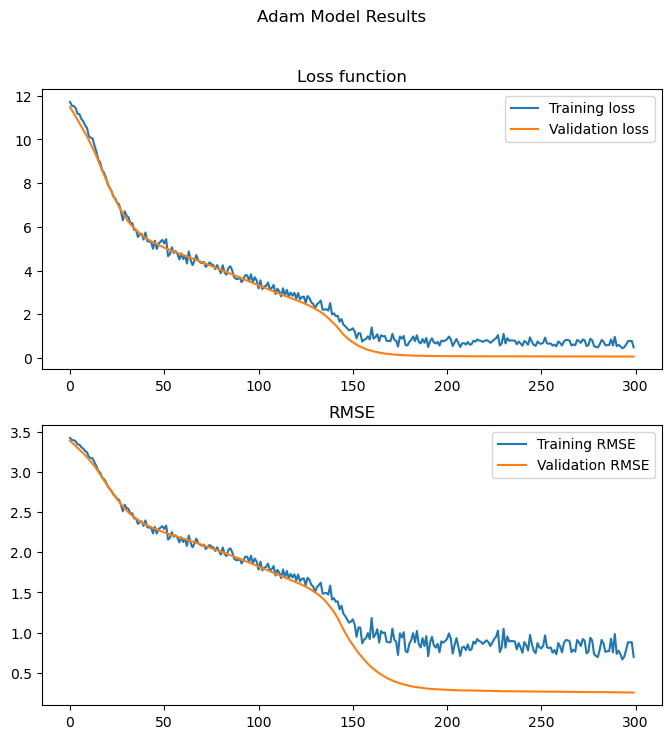

Adam Model Training RMSE: 0.697
Adam Model Validation RMSE: 0.254


In [53]:
plot_metrics(adam, 'Adam')

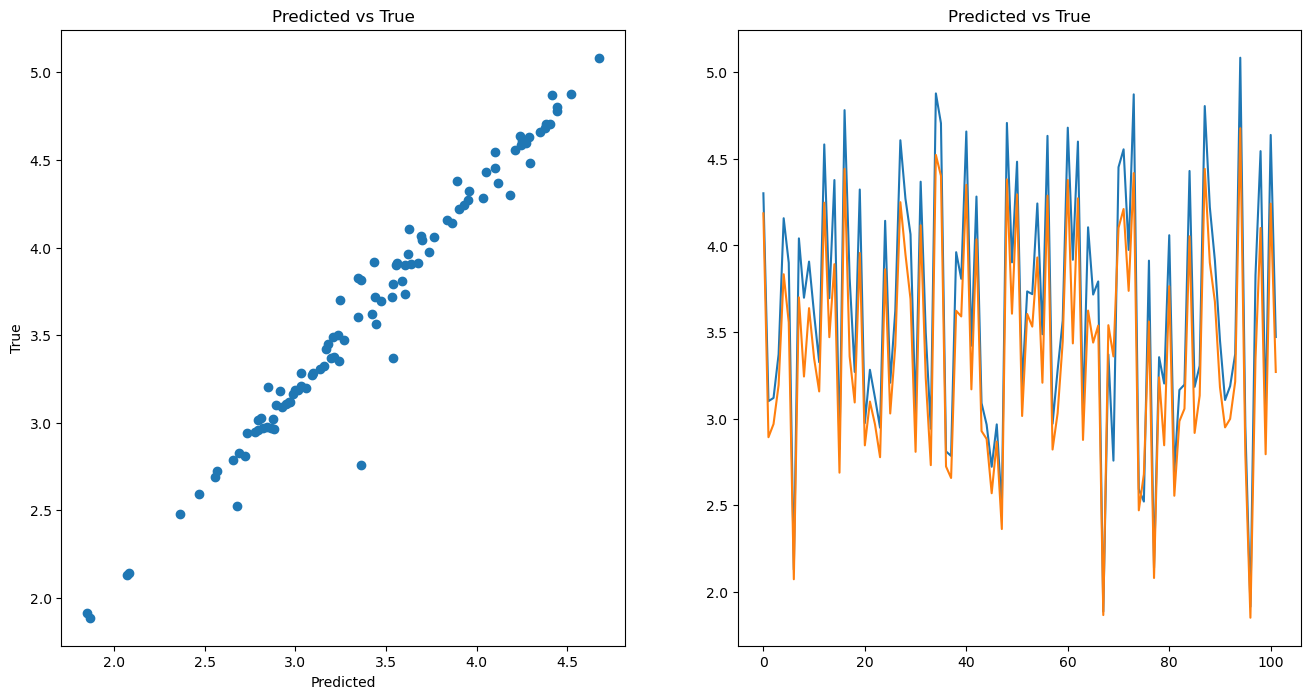

RMSE of the Adam model : 0.2755


In [54]:
plot_scatter(adam_model, 'Adam')

In [55]:
adam_metrics = performance_metric('adam')
adam_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,adam,0.2504,0.2755,0.3813,0.8546


### 3.1.2. Adagrad

In [56]:
# Built a new model using the parameters from the RSCV
adagrad_model = build_dnn('adagrad',num_features = num_features, 
                          num_neurons = 1, num_layers = 1, dropout = 0.1)
adagrad = adagrad_model.fit(X_train, y_train, epochs = 300, 
                            validation_split = 0.3, verbose = 0)
test_pred = adagrad_model.predict(X_test)
# Print summary
adagrad_model.summary()

4/4 [==============================] - 0s 1ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


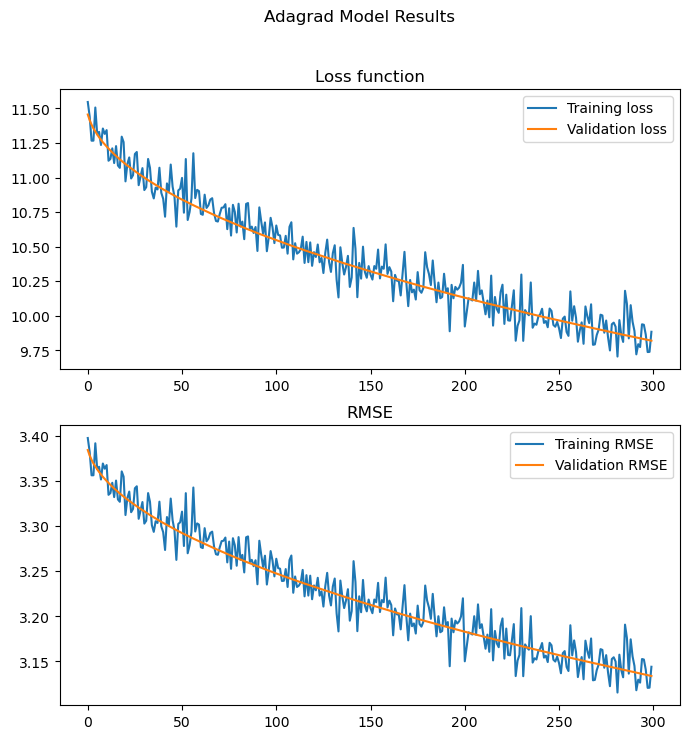

Adagrad Model Training RMSE: 3.144
Adagrad Model Validation RMSE: 3.134


In [57]:
plot_metrics(adagrad, 'Adagrad')

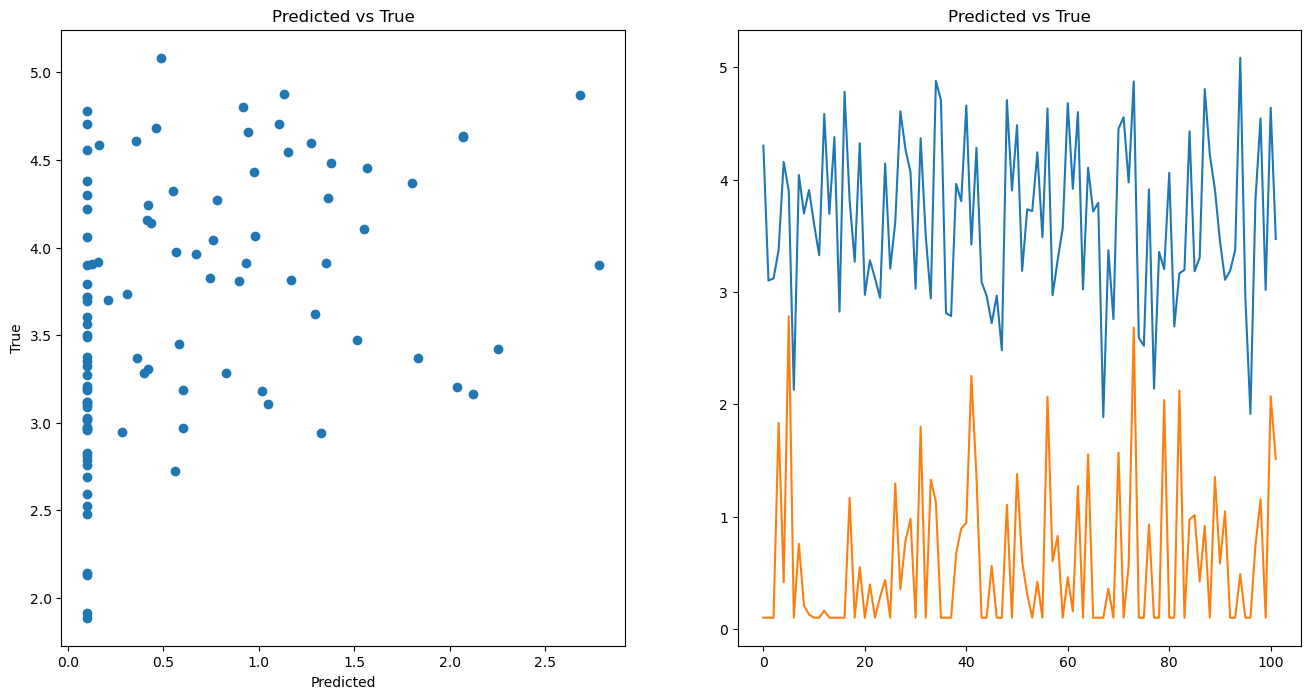

RMSE of the Adam model : 3.1312


In [58]:
plot_scatter(adagrad_model, 'Adam')

In [59]:
adagrad_metrics = performance_metric('adagrad')
adagrad_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,adagrad,3.0328,3.1312,4.3334,-17.778


### 3.1.3. Stochastic gradient descent

In [60]:
# Built a new model using the parameters from the RSCV
sgd_model = build_dnn('sgd',num_features = num_features, 
                      num_neurons = 1, num_layers = 1, dropout = 0.1)
sgd = sgd_model.fit(X_train, y_train, epochs = 300, 
                    validation_split = 0.3, verbose = 0)
test_pred = sgd_model.predict(X_test)
# Print summary
sgd_model.summary()

4/4 [==============================] - 0s 1ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 13        
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


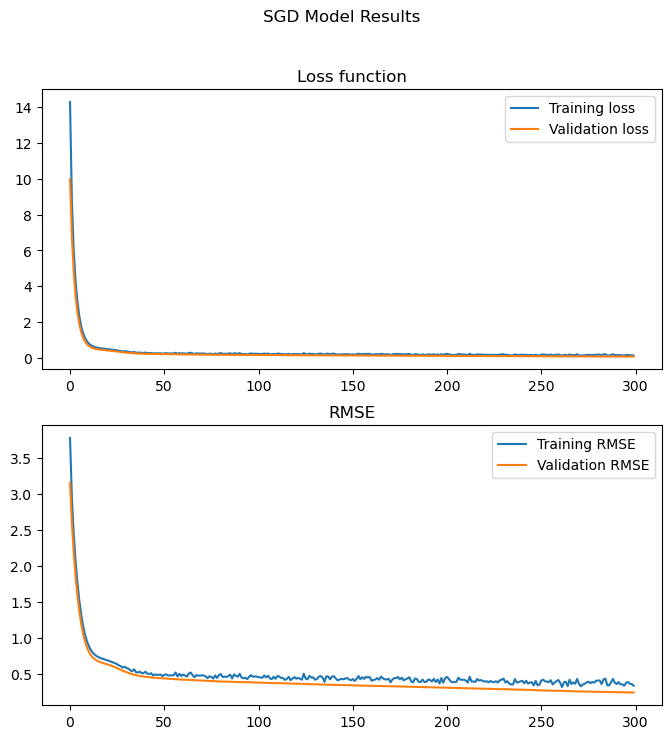

SGD Model Training RMSE: 0.336
SGD Model Validation RMSE: 0.242


In [61]:
plot_metrics(sgd, 'SGD')

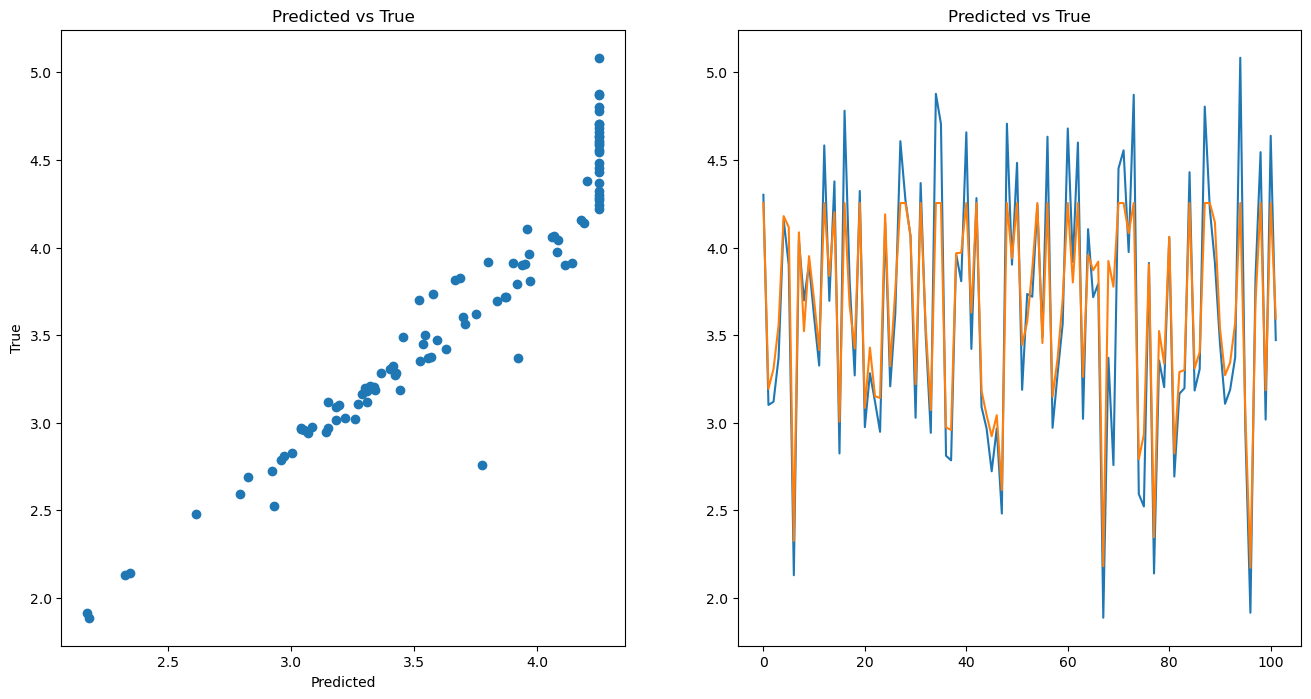

RMSE of the SGD model : 0.2595


In [62]:
plot_scatter(sgd_model, 'SGD')

In [63]:
sgd_metrics = performance_metric('SGD')
sgd_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,SGD,0.1951,0.2595,0.3592,0.871


### 3.1.4. RMSprop

In [64]:
# Built a new model using the parameters from the RSCV
rms_model = build_dnn('rmsprop',num_features = num_features, 
                      num_neurons = 1, num_layers = 1, dropout = 0.1)
rms = rms_model.fit(X_train, y_train, epochs = 300, 
                    validation_split = 0.3, verbose = 0)
test_pred = rms_model.predict(X_test)
# Print summary
rms_model.summary()

4/4 [==============================] - 0s 3ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
 dropout_4 (Dropout)         (None, 1)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


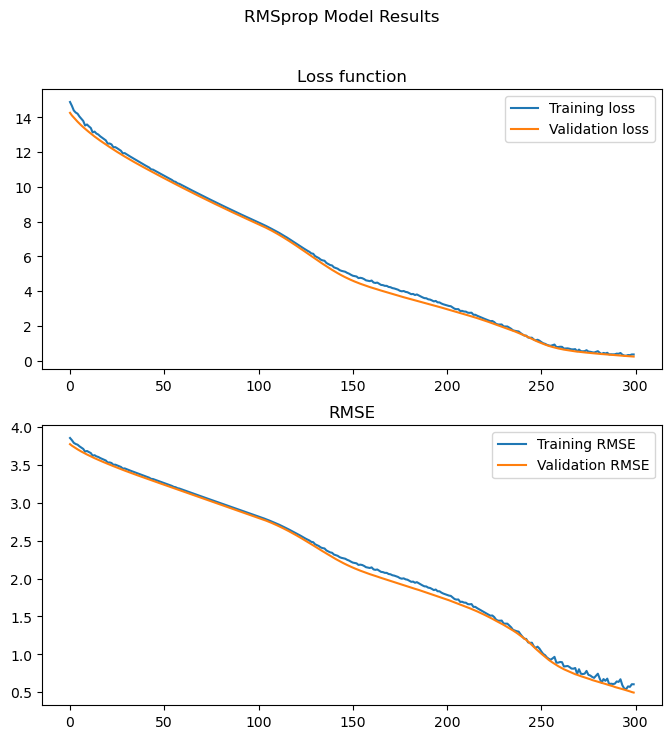

RMSprop Model Training RMSE: 0.604
RMSprop Model Validation RMSE: 0.495


In [65]:
plot_metrics(rms, 'RMSprop')

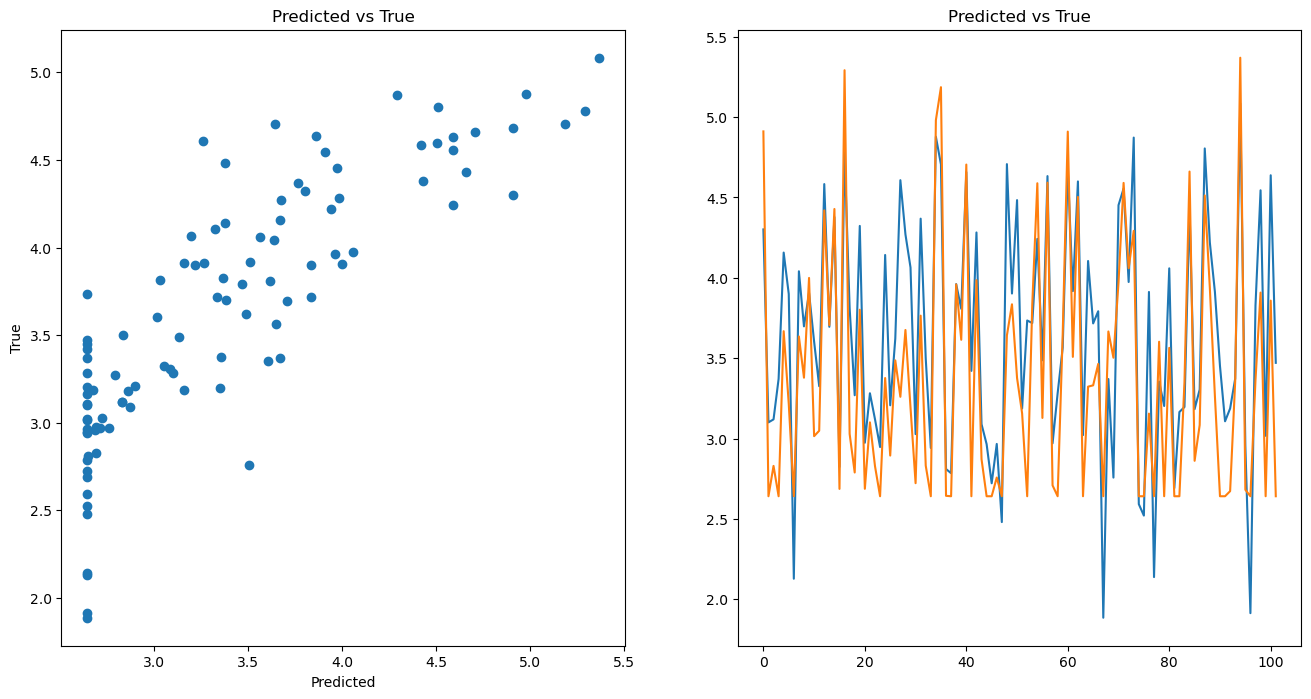

RMSE of the RMSprop model : 0.4874


In [66]:
plot_scatter(rms_model, 'RMSprop')

In [67]:
rms_metrics = performance_metric('RMSprop')
rms_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,RMSprop,0.3992,0.4874,0.6745,0.545


## 3.2. Baseline model

In [68]:
ml_metrics = pd.concat([adam_metrics, adagrad_metrics, 
                        sgd_metrics, rms_metrics], axis=0)

ml_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,adam,0.2504,0.2755,0.3813,0.8546
0,adagrad,3.0328,3.1312,4.3334,-17.7780
0,SGD,0.1951,0.2595,0.3592,0.8710
0,RMSprop,0.3992,0.4874,0.6745,0.5450


From the metrics above, we choose SGD as the optimizer

In [82]:
# Built a new model using the parameters from the RSCV
base_model = build_dnn('sgd',num_features = num_features, 
                       num_neurons = 1, num_layers = 1, dropout = 0)
base = base_model.fit(X_train, y_train, epochs = 300, 
                      validation_split = 0.3, verbose = 0)
test_pred = base_model.predict(X_test)
y_hat = base_model.predict(X_test)
# Print summary
base_model.summary()

4/4 [==============================] - 0s 6ms/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 13        
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


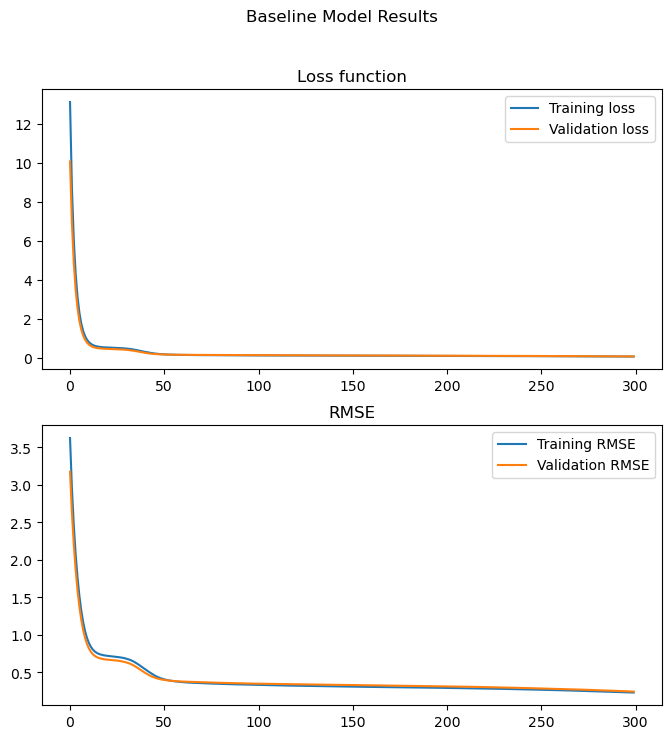

Baseline Model Training RMSE: 0.230
Baseline Model Validation RMSE: 0.243


In [83]:
plot_metrics(base, 'Baseline')

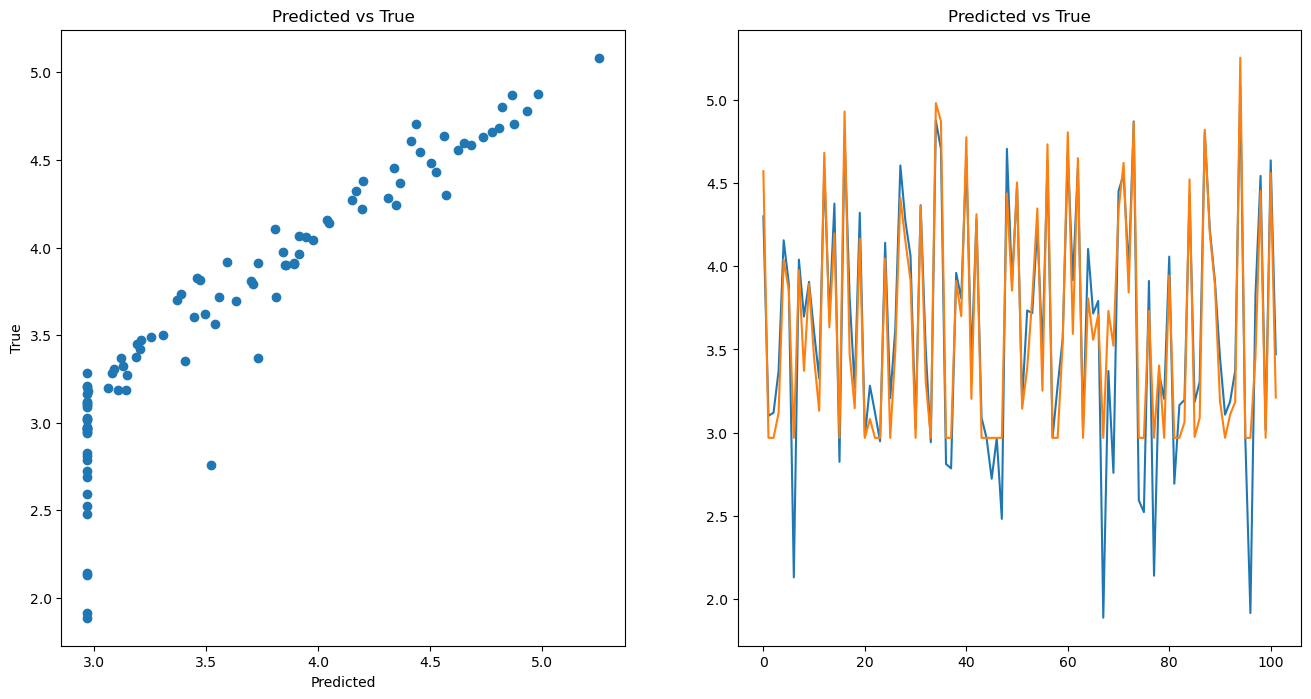

RMSE of the Baseline model : 0.2707


In [84]:
plot_scatter(base_model, 'Baseline')

In [85]:
base_metrics = performance_metric('baseline')
base_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,baseline,0.1844,0.2707,0.3746,0.8597


# 4. Hyperparameter Tuning

In [86]:
def build_dnn(num_features, num_neurons, num_layers, dropout = 0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation = "relu"))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer = 'sgd',
        loss = "mse",
        metrics = [keras.metrics.RootMeanSquaredError(name = "rmse")]
    )
    return model

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

# Define parameters
param_grid = {
    "num_neurons": np.arange(1, 5), 
    "num_layers": np.arange(1, 2),  
    "dropout": np.arange(1, 3) / 10, 
}

# Set the model
gscv_model = KerasRegressor(
    model = build_dnn, epochs = 500,
    num_features = num_features, 
    num_neurons = None, num_layers = None, dropout = None
)

# Build the cross-validator
gscv = RandomizedSearchCV(
    estimator = gscv_model, param_distributions = param_grid, 
    scoring = "neg_mean_squared_error", n_jobs = -1,
    cv = 10, verbose = 1, return_train_score = True
)

# Fit the model
cv_results = gscv.fit(X_train, y_train)

C:\Users\marce\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 8.2068 - rmse: 2.8648
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 3.4546 - rmse: 1.8587
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 2.3182 - rmse: 1.5226
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 1.5465 - rmse: 1.2436
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1932 - rmse: 1.0923
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8181 - rmse: 0.9045
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6509 - rmse: 0.8068
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5329 - rmse: 0.7300
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4439 - rmse: 0.6663
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3553 - r

13/13 [==============================] - 0s 1ms/step - loss: 0.0943 - rmse: 0.3071
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0889 - rmse: 0.2982
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0908 - rmse: 0.3013
Epoch 88/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0849 - rmse: 0.2913
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1054 - rmse: 0.3247
Epoch 90/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0967 - rmse: 0.3110
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0905 - rmse: 0.3008
Epoch 92/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1033 - rmse: 0.3215
Epoch 93/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1132 - rmse: 0.3364
Epoch 94/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0904 - rmse: 0.3006
Epoch 95/500
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step - loss: 0.0876 - rmse: 0.2960
Epoch 170/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0833 - rmse: 0.2886
Epoch 171/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1011 - rmse: 0.3180
Epoch 172/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0851 - rmse: 0.2916
Epoch 173/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0846 - rmse: 0.2909
Epoch 174/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0946 - rmse: 0.3075
Epoch 175/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0898 - rmse: 0.2996
Epoch 176/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0779 - rmse: 0.2790
Epoch 177/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0831 - rmse: 0.2883
Epoch 178/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0940 - rmse: 0.3066
Epoch 179/500
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.0790 - rmse: 0.2811
Epoch 254/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0677 - rmse: 0.2602
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0834 - rmse: 0.2888
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0732 - rmse: 0.2706
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0765 - rmse: 0.2766
Epoch 258/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0784 - rmse: 0.2799
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0780 - rmse: 0.2792
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0792 - rmse: 0.2814
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0773 - rmse: 0.2781
Epoch 262/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0773 - rmse: 0.2780
Epoch 263/500
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.0782 - rmse: 0.2796
Epoch 338/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0795 - rmse: 0.2819
Epoch 339/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0800 - rmse: 0.2828
Epoch 340/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0707 - rmse: 0.2659
Epoch 341/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0765 - rmse: 0.2766
Epoch 342/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0691 - rmse: 0.2630
Epoch 343/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0757 - rmse: 0.2752
Epoch 344/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0742 - rmse: 0.2725
Epoch 345/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0724 - rmse: 0.2691
Epoch 346/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0847 - rmse: 0.2911
Epoch 347/500
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.0749 - rmse: 0.2737
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0632 - rmse: 0.2515
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0708 - rmse: 0.2660
Epoch 424/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0684 - rmse: 0.2616
Epoch 425/500
13/13 [==============================] - 0s 811us/step - loss: 0.0677 - rmse: 0.2602
Epoch 426/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0829 - rmse: 0.2879
Epoch 427/500
13/13 [==============================] - 0s 582us/step - loss: 0.0740 - rmse: 0.2721
Epoch 428/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0677 - rmse: 0.2602
Epoch 429/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0607 - rmse: 0.2464
Epoch 430/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0731 - rmse: 0.2704
Epoch 431/500
13/13 [===================

In [95]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",cv_results.best_score_)
print("\n The best parameters across ALL searched params:\n",cv_results.best_params_)
final_neurons = cv_results.best_params_.get('num_neurons')
final_layers = cv_results.best_params_.get('num_layers')
final_dropout = cv_results.best_params_.get('dropout')

 Results from Grid Search 

 The best score across ALL searched params:
 -0.02728569709434514

 The best parameters across ALL searched params:
 {'num_neurons': 4, 'num_layers': 1, 'dropout': 0.1}


In [96]:
# Built a new model using the parameters from the RSCV
gscv_model = build_dnn(num_features = num_features, 
                       num_neurons = final_neurons, num_layers = final_layers, dropout = final_dropout)
gscvDNN = gscv_model.fit(X_train, y_train, epochs = 500, 
                         validation_split = 0.3, verbose = 0)
test_pred = gscv_model.predict(X_test)
y_hat = gscv_model.predict(X_test)
# Print summary
gscv_model.summary()

4/4 [==============================] - 0s 5ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 52        
                                                                 
 dropout_12 (Dropout)        (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


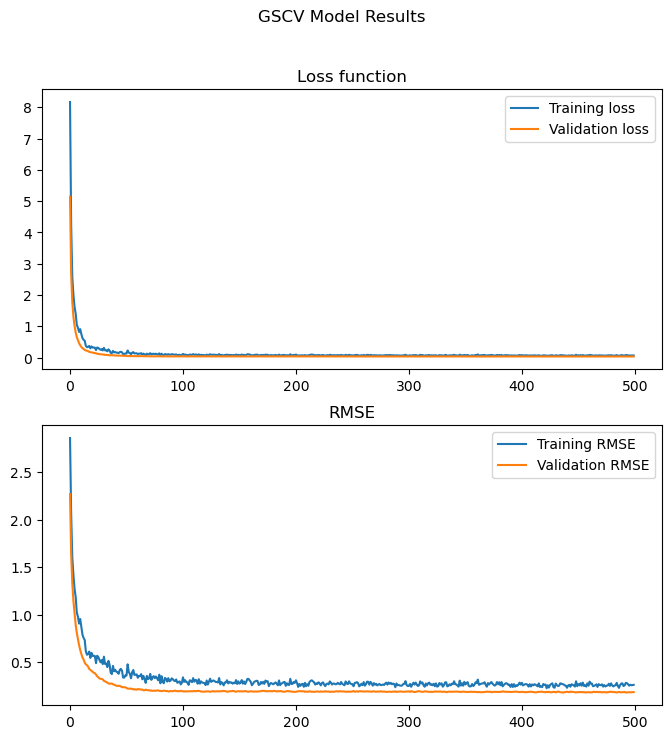

GSCV Model Training RMSE: 0.260
GSCV Model Validation RMSE: 0.184


In [97]:
plot_metrics(gscvDNN, 'GSCV')

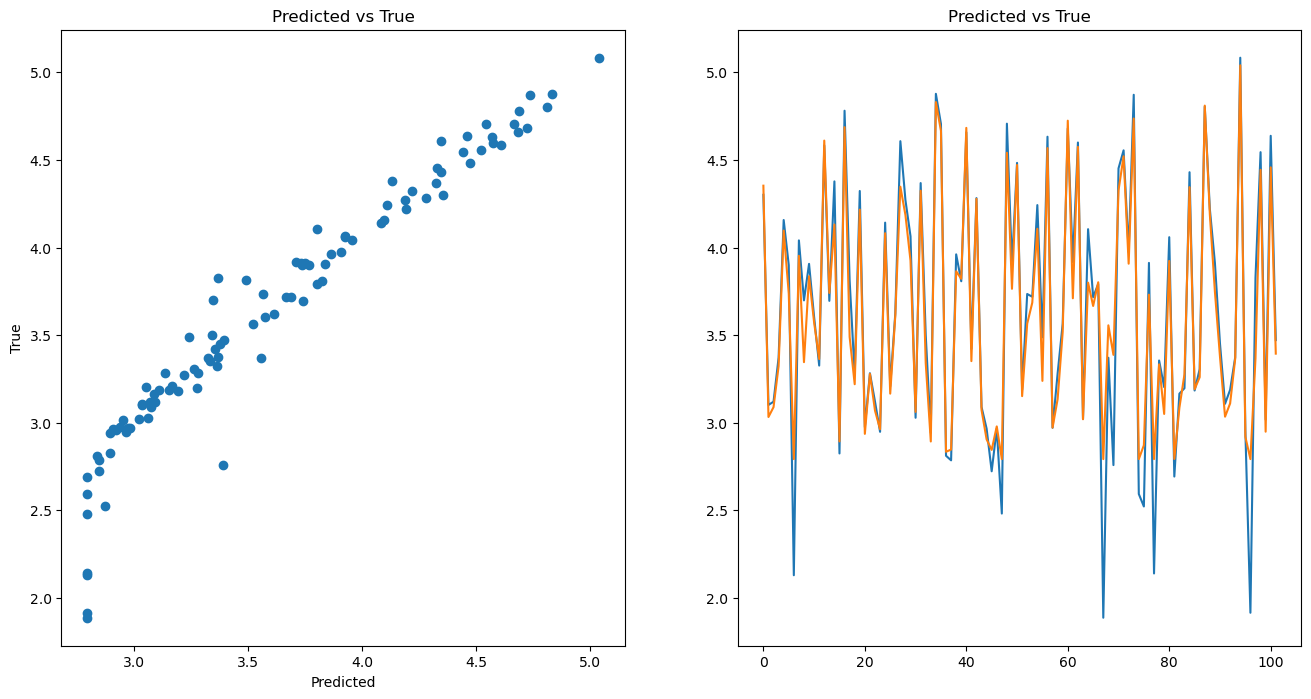

RMSE of the GSCV model : 0.2098


In [98]:
plot_scatter(gscv_model, 'GSCV')

In [99]:
gscv_metrics = performance_metric('gscv')
gscv_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,gscv,0.1257,0.2098,0.2903,0.9157


In [100]:
base_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,baseline,0.1844,0.2707,0.3746,0.8597


# 5. Regularization

## 5.1. L1 regulizer

In [105]:
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l1(0.01)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [106]:
# Built a new model using the parameters from the RSCV
l1_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l1DNN = l1_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l1_model.predict(X_test)
y_hat = l1_model.predict(X_test)
# Print summary
l1_model.summary()

4/4 [==============================] - 0s 2ms/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 52        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


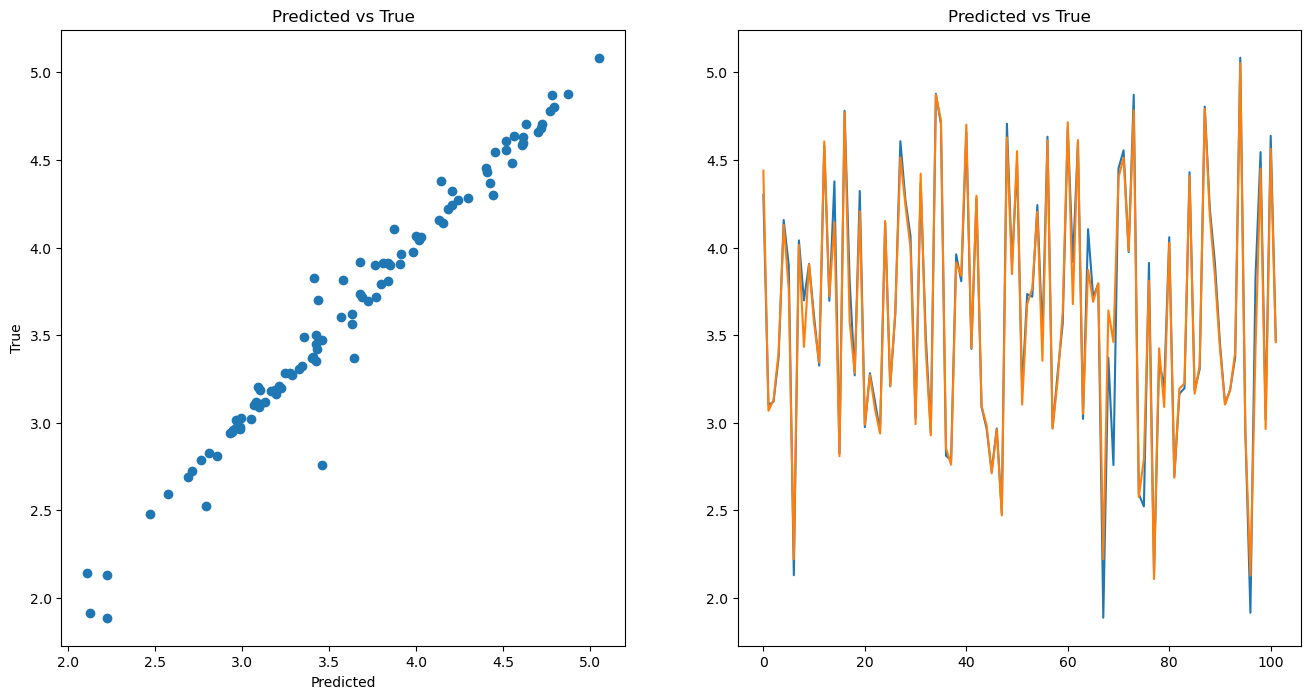

RMSE of the L1 model : 0.1208


In [107]:
plot_scatter(l1_model, 'L1')

In [108]:
l1_metrics = performance_metric('l1')
l1_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l1,0.0672,0.1208,0.1672,0.972


In [109]:
# try increasing the l1 value
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l1(0.02)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [110]:
# Built a new model using the parameters from the RSCV
l12_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l12DNN = l12_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l12_model.predict(X_test)
y_hat = l12_model.predict(X_test)
# Print summary
l12_model.summary()

4/4 [==============================] - 0s 3ms/step
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4)                 52        
                                                                 
 dense_33 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [111]:
l12_metrics = performance_metric('l12')
l12_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l12,0.0687,0.1247,0.1725,0.9702


l1 = 0.01 has better performance

# 5.2. L2 regulizer

In [112]:
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [113]:
# Built a new model using the parameters from the RSCV
l2_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l2DNN = l2_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l2_model.predict(X_test)
y_hat = l2_model.predict(X_test)
# Print summary
l2_model.summary()

4/4 [==============================] - 0s 490us/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 52        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


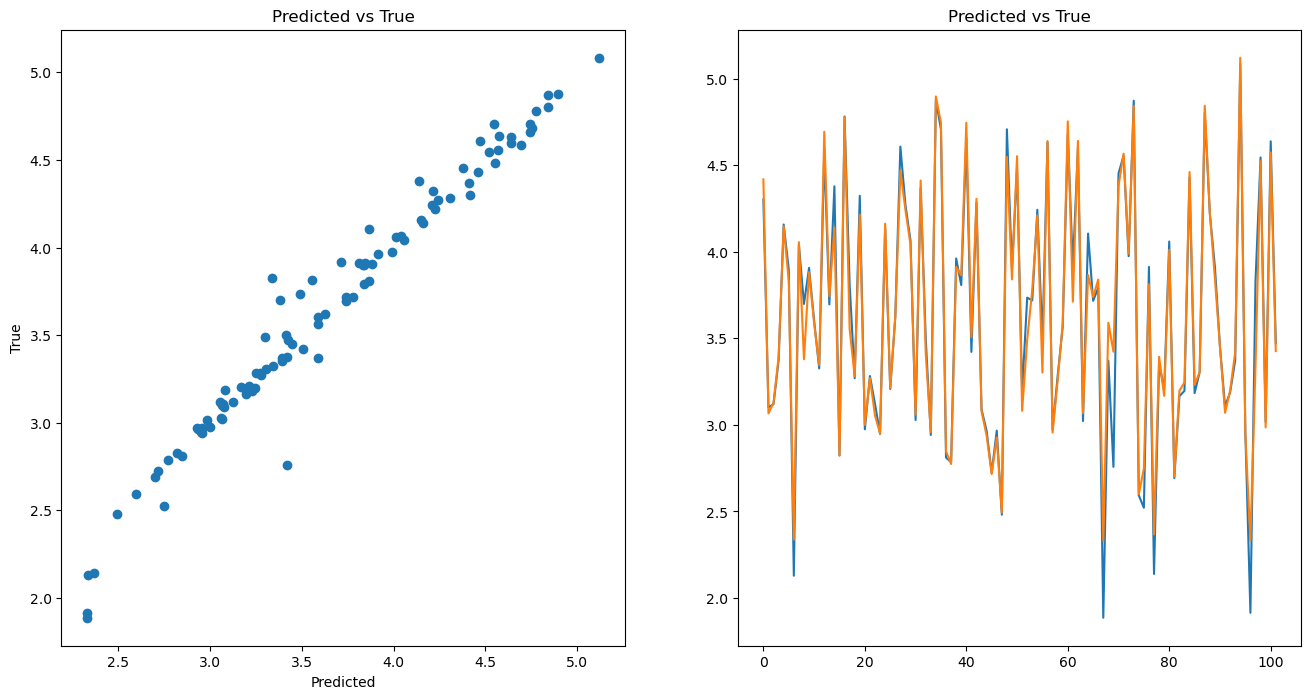

RMSE of the L2 model : 0.1362


In [114]:
plot_scatter(l2_model, 'L2')

In [115]:
l2_metrics = performance_metric('l2')
l2_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l2,0.0779,0.1362,0.1885,0.9645


In [116]:
# increase l2 value
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.02)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [117]:
# Built a new model using the parameters from the RSCV
l22_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l22DNN = l22_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l22_model.predict(X_test)
y_hat = l22_model.predict(X_test)
# Print summary
l22_model.summary()

4/4 [==============================] - 0s 4ms/step
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 52        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [118]:
l22_metrics = performance_metric('l22')
l22_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l22,0.0664,0.1198,0.1658,0.9725


In [119]:
# increase l2 value
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.03)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [120]:
# Built a new model using the parameters from the RSCV
l23_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l23DNN = l23_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l23_model.predict(X_test)
y_hat = l23_model.predict(X_test)
# Print summary
l23_model.summary()

4/4 [==============================] - 0s 4ms/step
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 4)                 52        
                                                                 
 dense_39 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [121]:
l23_metrics = performance_metric('l23')
l23_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l23,0.0662,0.1183,0.1637,0.9732


In [122]:
# increase l2 value
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.04)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [125]:
# Built a new model using the parameters from the RSCV
l24_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l24DNN = l24_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l24_model.predict(X_test)
y_hat = l24_model.predict(X_test)
# Print summary
l24_model.summary()

4/4 [==============================] - 0s 2ms/step
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 4)                 52        
                                                                 
 dense_43 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [126]:
l24_metrics = performance_metric('l24')
l24_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l24,0.0727,0.1279,0.1771,0.9686


l2 = 0.03 has better performance

## 5.3. L1L2 regulizer

In [153]:
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", 
                               kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.03)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [157]:
# Built a new model using the parameters from the RSCV
l1l2_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
l1l2DNN = l1l2_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = l1l2_model.predict(X_test)
y_hat = l1l2_model.predict(X_test)
# Print summary
l1l2_model.summary()

4/4 [==============================] - 0s 2ms/step
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 4)                 52        
                                                                 
 dense_61 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


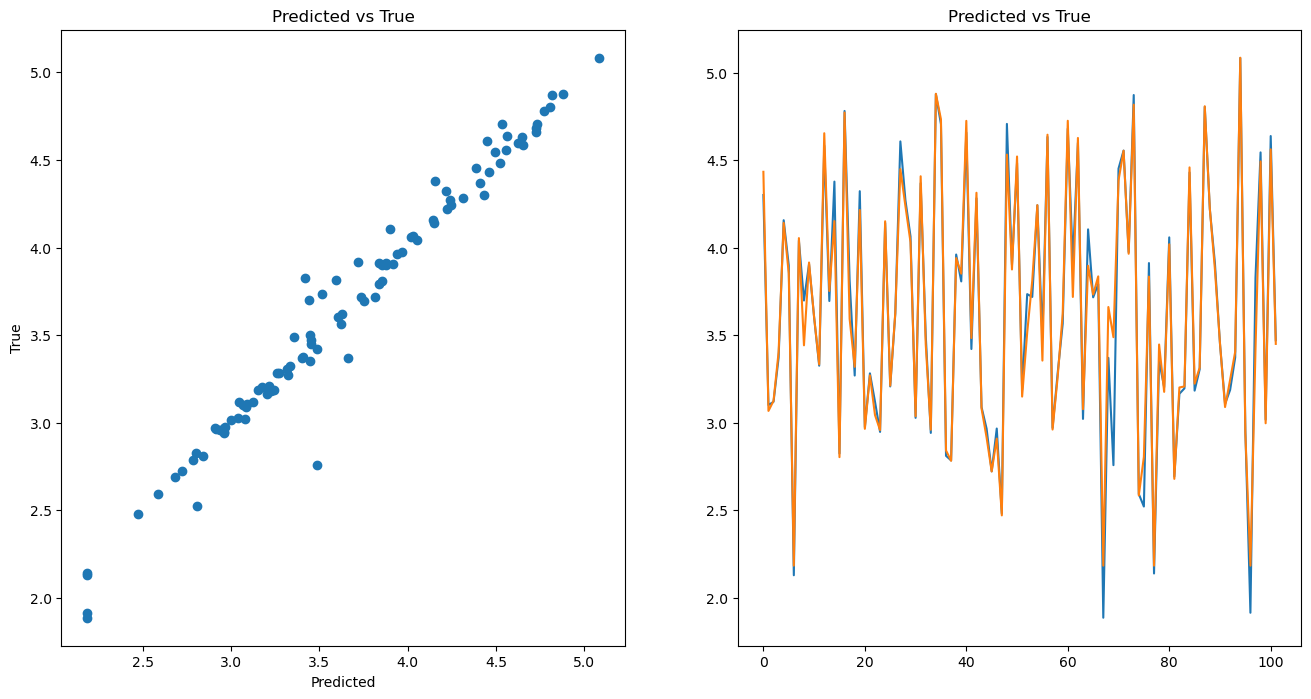

RMSE of the L1L2 model : 0.1232


In [158]:
plot_scatter(l1l2_model, 'L1L2')

In [159]:
l1l2_metrics = performance_metric('l1l2')
l1l2_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,l1l2,0.0672,0.1232,0.1705,0.9709


# 6. Final neural network module

In [160]:
# find the best model
dnn_metrics = pd.concat([base_metrics, gscv_metrics, 
                        l1_metrics, l23_metrics, l1l2_metrics], axis=0)

dnn_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,baseline,0.1844,0.2707,0.3746,0.8597
0,gscv,0.1257,0.2098,0.2903,0.9157
0,l1,0.0672,0.1208,0.1672,0.9720
0,l23,0.0662,0.1183,0.1637,0.9732
0,l1l2,0.0672,0.1232,0.1705,0.9709


The best model is the l23 model which is neural network with l2 regulization value of 0.03

In [161]:
def build_dnn(num_features, num_neurons, num_layers, dropout=0):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(num_features))

    for layer in range(num_layers):
        model.add(layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.03)))
        if dropout > 0:
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer="sgd",
        loss="mse",
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

In [192]:
# Built a new model using the parameters from the RSCV
dnn_model = build_dnn(num_features = num_features, num_neurons = final_neurons, num_layers = final_layers, dropout = 0)
dnn = dnn_model.fit(X_train, y_train, epochs = 500, validation_split = 0.3, verbose = 0)
test_pred = dnn_model.predict(X_test)
y_hat = dnn_model.predict(X_test)
# Print summary
dnn_model.summary()

4/4 [==============================] - 0s 2ms/step
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 4)                 52        
                                                                 
 dense_83 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


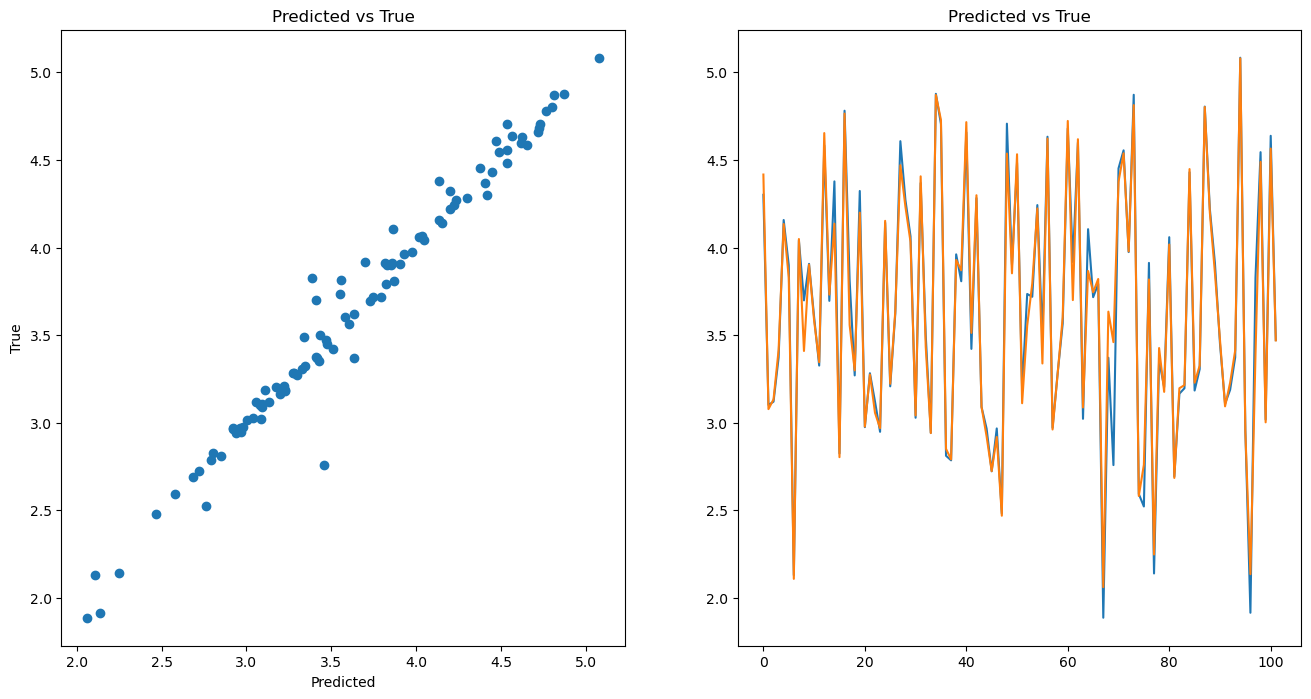

RMSE of the dnn model : 0.1202


In [193]:
plot_scatter(dnn_model, 'dnn')

In [194]:
dnn_metrics = performance_metric('dnn')
dnn_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,dnn,0.0672,0.1202,0.1663,0.9723


# 7. Feature importance

In [212]:
# Calculate RMSE with each feature perturbed
feature_importances = []
column = transformed_features.columns.tolist()

for i in range(num_features):
    X_test_perturbed = X_test.copy()
    X_test_perturbed[:, i] = X_test_perturbed[:, i] + np.random.normal(scale=0.1, size=len(X_test))
    perturbed_predictions = gscv_model.predict(X_test_perturbed).flatten()
    perturbed_rmse = np.sqrt(np.mean((perturbed_predictions - y_test)**2))
    feature_importance = gscv_metrics.iloc[0]['RMSE'] - perturbed_rmse
    feature_importances.append(feature_importance)

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"{column[i]}: Importance = {importance:.4f}")

4/4 [==============================] - 0s 5ms/step
Listing_at: Importance = 0.0000
Qualified_Institutional_Buyers: Importance = -0.0003
Non_Institutional_Investors: Importance = -0.0008
Retail_Individual_Investors: Importance = 0.0001
Bid_Opening_Month: Importance = 0.0000
Bid_Closing_Month: Importance = -0.0001
boxcox Bid_Price_From: Importance = -0.0003
boxcox Bid_Price_To: Importance = 0.0001
boxcox Market_Lot: Importance = 0.0002
boxcox Total_Subscription: Importance = 0.0002
boxcox Listing_day_open: Importance = -0.0004
boxcox Bidding_Period: Importance = -0.0001


# 8. Model comparison

In [213]:
final_metrics = pd.concat([dnn_metrics, rf_metrics, 
                        gbr_metrics, xgb_metrics], axis=0)

final_metrics

,Model,MAE,RMSE,Scatter Index,R2
0,dnn,0.0672,0.1202,0.1663,0.9723
0,random forest,0.0808,0.1532,0.2132,0.9545
0,gradient boosting,0.0839,0.1675,0.2152,0.9537
0,xgboost,0.0539,0.0969,0.1391,0.9806
